In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
link = 'Data.csv'
data = pd.read_csv(link)
data.columns

Index(['grade', 'score10', 'score4', 'score5', 'score6', 'score7', 'score1',
       'score2', 'score3', 'score8', 'score9', 'Name'],
      dtype='object')

In [3]:
data.describe()

,score10,score4,score5,score6,score7,score1,score2,score3,score8,score9
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,82.473800,84.940200,83.380600,82.140400,82.425400,90.815800,91.035200,84.798000,82.397200,82.364400
std,13.023196,13.737102,13.484054,13.007418,13.122853,8.615818,8.519817,14.048241,12.949802,12.848013
min,40.000000,40.000000,40.000000,40.000000,40.000000,60.000000,60.000000,40.000000,40.000000,40.000000
25%,76.000000,77.000000,76.000000,76.000000,76.000000,90.000000,90.000000,77.000000,76.000000,76.000000
50%,85.000000,91.000000,87.000000,85.000000,85.000000,93.000000,94.000000,91.000000,85.000000,85.000000
75%,92.000000,95.000000,94.000000,92.000000,92.000000,96.000000,97.000000,95.000000,92.000000,92.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   grade    5000 non-null   object
 1   score10  5000 non-null   int64 
 2   score4   5000 non-null   int64 
 3   score5   5000 non-null   int64 
 4   score6   5000 non-null   int64 
 5   score7   5000 non-null   int64 
 6   score1   5000 non-null   int64 
 7   score2   5000 non-null   int64 
 8   score3   5000 non-null   int64 
 9   score8   5000 non-null   int64 
 10  score9   5000 non-null   int64 
 11  Name     5000 non-null   object
dtypes: int64(10), object(2)
memory usage: 468.9+ KB


In [5]:
data.shape

(5000, 12)

In [6]:
data.head()

,grade,score10,score4,score5,score6,score7,score1,score2,score3,score8,score9,Name
0,Fair,94,67,99,67,72,94,84,81,93,63,SAI TARUN PAWAR
1,Very good,77,95,85,81,83,92,98,97,83,82,AKSHAY Dasgupta
2,Exceptional,91,95,93,95,93,91,93,91,83,85,Aneet Randhawa
3,Good,75,72,91,84,93,93,98,77,74,97,FARDIN NAWAB ALI BHATI
4,Fair,80,77,87,75,89,82,94,84,99,75,ASHISH KUMAR


In [7]:
data.grade.unique()

array(['Fair', 'Very good', 'Exceptional', 'Good', 'Poor'], dtype=object)

In [8]:
def change_grade(x):
    arr = ['Poor','Fair','Good','Very good','Exceptional']
    for i in arr:
        if x == i:
            return(arr.index(i))
        else: pass
data.grade = data.grade.map(change_grade)

In [9]:
data.head()

,grade,score10,score4,score5,score6,score7,score1,score2,score3,score8,score9,Name
0,1,94,67,99,67,72,94,84,81,93,63,SAI TARUN PAWAR
1,3,77,95,85,81,83,92,98,97,83,82,AKSHAY Dasgupta
2,4,91,95,93,95,93,91,93,91,83,85,Aneet Randhawa
3,2,75,72,91,84,93,93,98,77,74,97,FARDIN NAWAB ALI BHATI
4,1,80,77,87,75,89,82,94,84,99,75,ASHISH KUMAR


In [10]:
cols = ['score10', 'score4', 'score5', 'score6', 'score7', 'score1',
       'score2', 'score3', 'score8', 'score9',]
X = data[cols]
y=data.grade

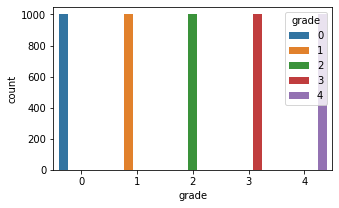

In [11]:
plt.figure(figsize=(5,3))
sns.countplot(data.grade,hue=data.grade)
# Totally balanced data

#### The data seems to be pretty neat, so applying model without changing 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [13]:
def accuracy(l1):
    l2 = y_test
    sum=0
    a = list(l2)
    for i in range(len(a)):
        if a[i] == l1[i]:
            sum+=1
    return(sum/len(prediction)*100)

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=48, random_state=0,criterion='gini')
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy(prediction)

95.8

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=50000).fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy(predictions)

77.4

In [16]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6) #I claculated optimal value of k but later deleted that cell
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
print(accuracy(pred))

79.2


## Applying PCA

In [17]:
from sklearn import decomposition
pca = decomposition.PCA()

In [18]:
pca.n_components = 2
pca_data = pca.fit_transform(X)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)




shape of pca_reduced.shape =  (5000, 2)


In [19]:
pca_data = np.vstack((pca_data.T, y)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "grade"))

/home/jitmanewtyagi/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


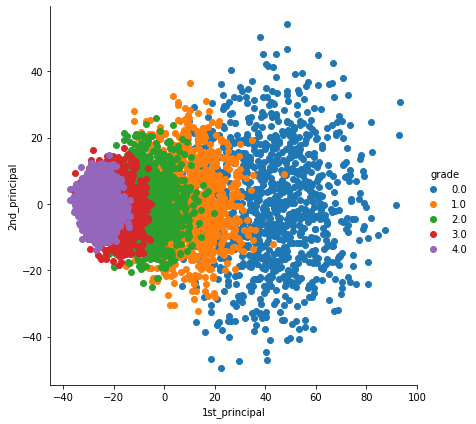

In [20]:

sns.FacetGrid(pca_df, hue="grade", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

In [21]:
convData = pd.DataFrame(columns=['comp1','comp2','grade'])
convData['comp1']=pca_data[:,0]
convData['comp2']=pca_data[:,1]

In [22]:
convData['grade'] = pca_data[:,2]

In [23]:
convData.head(10)

,comp1,comp2,grade
0,10.395258,11.503423,1.0
1,-9.069875,0.112127,3.0
2,-21.125820,-3.409231,4.0
3,0.037916,5.868033,2.0
4,1.318340,18.326233,1.0
5,10.297317,5.235581,2.0
6,-23.725689,-3.279648,3.0
7,-21.538972,-5.814295,4.0
8,22.330119,-12.501673,0.0
9,-6.739471,-4.486703,2.0


In [24]:
cols=['comp1','comp2']
X1=convData[cols]
y1=convData.grade

In [25]:
X1.head()

,comp1,comp2
0,10.395258,11.503423
1,-9.069875,0.112127
2,-21.125820,-3.409231
3,0.037916,5.868033
4,1.318340,18.326233


In [26]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.10, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=48, random_state=0,criterion='gini')
clf.fit(X_train1, y_train1)
prediction = clf.predict(X_test1)
accuracy(prediction)

65.60000000000001

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=50000).fit(X_train1, y_train1)
predictions = clf.predict(X_test1)
accuracy(predictions)

66.4

In [29]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(X_train1, y_train1)
pred = neigh.predict(X_test1)
print(accuracy(pred))

67.2


Why PCA didn't work?
As we can see the correlation between features isn't good enough
so the PCA technique wont help

In [30]:
X.corr()

,score10,score4,score5,score6,score7,score1,score2,score3,score8,score9
score10,1.000000,0.384457,0.372145,0.349768,0.328788,0.395734,0.387539,0.373449,0.318794,0.311538
score4,0.384457,1.000000,0.423880,0.391606,0.356153,0.411109,0.454742,0.466421,0.368049,0.370645
score5,0.372145,0.423880,1.000000,0.356597,0.364598,0.420035,0.403802,0.399621,0.371395,0.356111
score6,0.349768,0.391606,0.356597,1.000000,0.303370,0.399002,0.377357,0.384380,0.311407,0.321566
score7,0.328788,0.356153,0.364598,0.303370,1.000000,0.391504,0.355818,0.379893,0.339026,0.304974
score1,0.395734,0.411109,0.420035,0.399002,0.391504,1.000000,0.483320,0.440927,0.413929,0.383858
score2,0.387539,0.454742,0.403802,0.377357,0.355818,0.483320,1.000000,0.421300,0.386685,0.375854
score3,0.373449,0.466421,0.399621,0.384380,0.379893,0.440927,0.421300,1.000000,0.401298,0.373718
score8,0.318794,0.368049,0.371395,0.311407,0.339026,0.413929,0.386685,0.401298,1.000000,0.316959
score9,0.311538,0.370645,0.356111,0.321566,0.304974,0.383858,0.375854,0.373718,0.316959,1.000000


## The best accuracy we have found so far is RandomForest, so training it onto full data

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=48, random_state=0,criterion='gini')
model.fit(X, y)
prediction = model.predict(X_test)

In [32]:
import pickle
filename = 'GradeModel.sav'
outfile = open(filename,'wb')
pickle.dump(model,outfile)
outfile.close()